# Flight Price Prediction


O objetivo deste projeto é prever o preço de passagens aéreas com base em diferentes características da viagem, como companhia aérea,
horário de partida, número de escalas, origem, destino e classe (econômica ou executiva).

O dataset foi coletado do site EaseMyTrip e contém mais de 300 mil registros de passagens entre as principais cidades da Índia.

## Dados

Tamanho: 300.261 registros, 11 variáveis.

Principais features:
Airline, Flight, Source City, Destination City, Class, Stops, Departure Time, Arrival Time, Duration, Days Left.

Target: Price (valor da passagem).

---


## 1. Data Exploration

Nesta etapa analisamos o dataset para entender sua estrutura, distribuição das variáveis, valores ausentes e possíveis outliers. Também verificamos relações entre features e o target (Price) para analisar o que será feito antes do pré-processamento.

In [1]:
import pandas as pd

df = pd.read_csv("../data/Clean_Dataset.csv")

df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [2]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [3]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [4]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [5]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [6]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [7]:
df['duration'].min()

0.83

In [8]:
df['duration'].max()

49.83

In [9]:
df['duration'].median()

11.25

## 2. Pre-Processing

Nesta etapa, os dados são limpos e preparados para os modelos de Machine Learning.

In [10]:
df = df.drop(['Unnamed: 0', 'flight'], axis=1)  # Remove colunas irrelevantes
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)  # Converte classe para binário

In [11]:
print(df.columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')


In [12]:
df.stops = pd.factorize(df.stops)[0]  # Converte 'stops' em binário

In [13]:
pd.get_dummies(df.airline, prefix='airline')  # Aplica one-hot encoding na coluna 'airline'

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
300148,False,False,False,False,False,True
300149,False,False,False,False,False,True
300150,False,False,False,False,False,True
300151,False,False,False,False,False,True


In [14]:
df = df.join(pd.get_dummies(df['airline'], prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df['source_city'], prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df['destination_city'], prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df['arrival_time'], prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df['departure_time'], prefix='departure')).drop('departure_time', axis=1)

In [15]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## 3. Training Regression Model
 
Nesta fase, treinamos um modelo de Random Forest Regressor para prever o preço das passagens aéreas.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [19]:
reg.score(X_test, y_test)

0.9852189472304878

In [20]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9852189472304878
MAE:  1073.020036491896
MSE:  7644319.6734725535
RMSE:  2764.8362833036886


Text(0.5, 1.0, 'Prediction vs Actual prices')

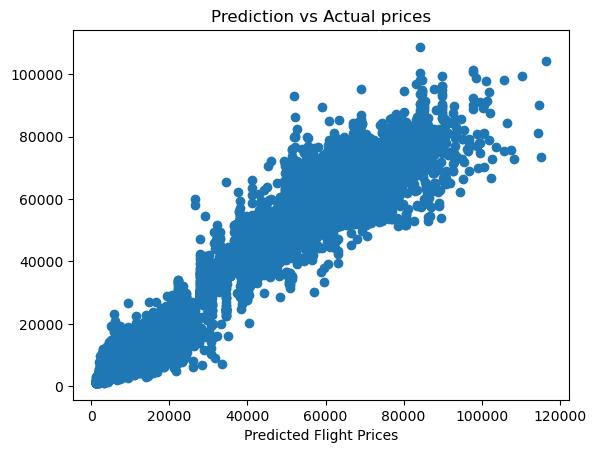

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Prices')
plt.xlabel('Predicted Flight Prices')
plt.title('Prediction vs Actual prices')

In [22]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [23]:
important_features_dict = {}

for idx, val in enumerate(reg.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict, key=important_features_dict.get, reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: [1, 2, 3, 9, 5]


In [24]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8798997085560819),
 ('duration', 0.05778629083003751),
 ('days_left', 0.01858662796609721),
 ('airline_Vistara', 0.005209856326293303),
 ('airline_Air_India', 0.00476321716453845),
 ('source_Delhi', 0.0035588259580185185),
 ('dest_Delhi', 0.003413472980198176),
 ('source_Mumbai', 0.002182776427158869),
 ('stops', 0.0019043447846381488),
 ('dest_Mumbai', 0.0018754345234757686),
 ('dest_Kolkata', 0.0018372927428286713),
 ('source_Kolkata', 0.0017248360202020572),
 ('arrival_Evening', 0.0016522447459954845),
 ('dest_Hyderabad', 0.001447736516755215),
 ('dest_Bangalore', 0.0013611820923575674),
 ('source_Hyderabad', 0.0012301690066042089),
 ('arrival_Night', 0.0011236686141829115),
 ('source_Bangalore', 0.0011014986061171372),
 ('departure_Evening', 0.001051813127884647),
 ('arrival_Afternoon', 0.0010050548923188746),
 ('source_Chennai', 0.0008814556704936356),
 ('departure_Morning', 0.0008568311069045425),
 ('departure_Afternoon', 0.0008409473266179021),
 ('dest_Chennai', 0.0

In [25]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

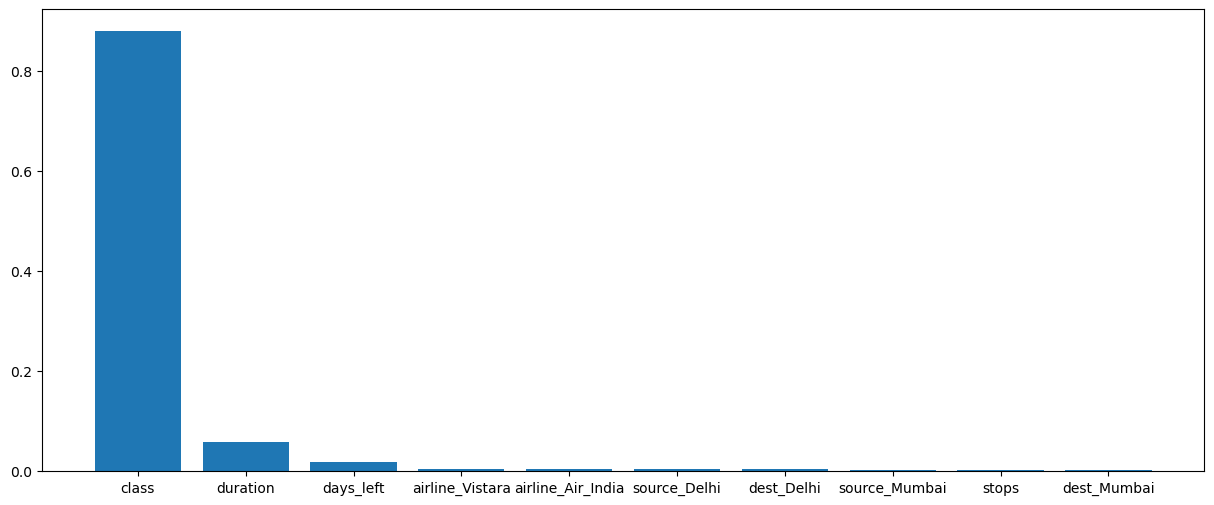

In [26]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

## 4. Hyperparameter Tuning

Nesta etapa ajustamos os parâmetros do modelo para melhorar a performance do Random Forest.

In [27]:
'''
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid.search.best_params_
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\nreg = RandomForestRegressor(n_jobs=-1)\n\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': ['auto', 'sqrt']\n}\n\ngrid_search = GridSearchCV(reg, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid.search.best_params_\n"

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [29]:
best_regressor.score(X_test, y_test)

0.9848002571655057

In [30]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9848002571655057
MAE:  1324.2689306192515
MSE:  7860853.688386015
RMSE:  2803.7213999229693
